Final parameters: a=0.997333333849981, b=2.367999994270291


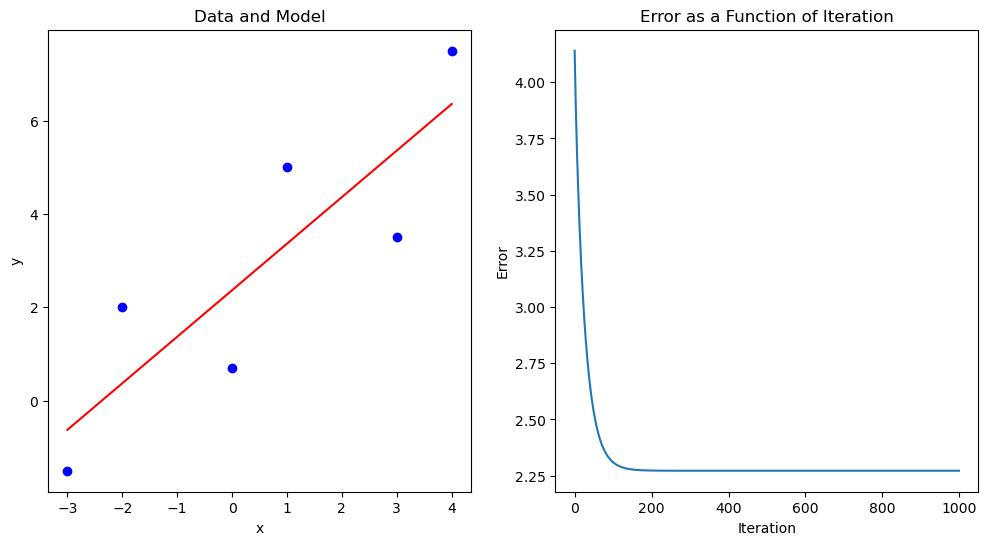

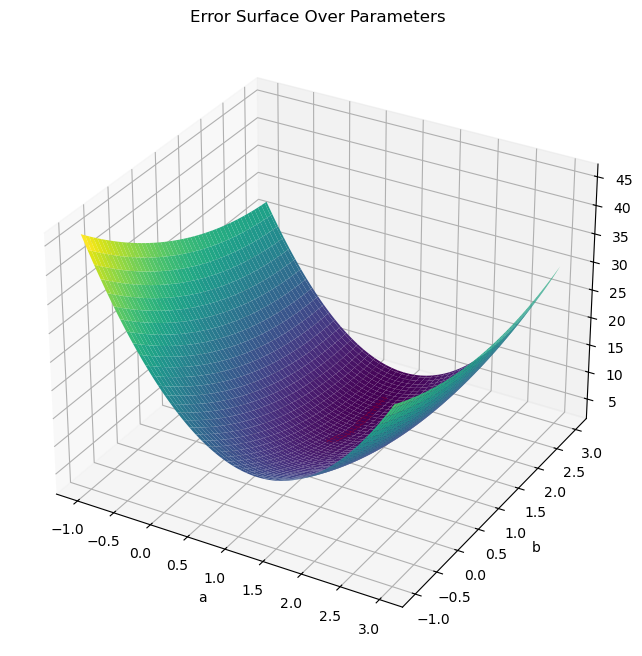

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Data
x = np.array([-3.0, -2.0, 0.0, 1.0, 3.0, 4.0])
y = np.array([-1.5, 2.0, 0.7, 5.0, 3.5, 7.5])

# Initial parameters
a, b = 1, 1

# Learning rate
lr = 0.01

# Number of iterations
iterations = 1000

# To store history of error
errors = []

# To store history of parameters
parameters = np.zeros((iterations, 2))

for i in range(iterations):
    # Calculate prediction
    y_pred = a * x + b

    # Calculate error
    error = y_pred - y
    errors.append((error**2).mean())

    # Calculate gradients
    a_grad = (2 * (error * x).mean())
    b_grad = (2 * error.mean())

    # Update parameters
    a -= lr * a_grad
    b -= lr * b_grad

    parameters[i, :] = [a, b]

# Display results
print(f"Final parameters: a={a}, b={b}")

# Plot data and model
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(x, y, color='blue')
plt.plot(x, a*x + b, color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Data and Model')

# Plot error as a function of iteration
plt.subplot(1, 2, 2)
plt.plot(range(iterations), errors)
plt.xlabel('Iteration')
plt.ylabel('Error')
plt.title('Error as a Function of Iteration')
plt.show()

# Plot error surface over parameters
a_values = np.linspace(-1, 3, 100)
b_values = np.linspace(-1, 3, 100)
A, B = np.meshgrid(a_values, b_values)

E = np.zeros_like(A)
for i in range(A.shape[0]):
    for j in range(A.shape[1]):
        y_pred = A[i, j]*x + B[i, j]
        E[i, j] = ((y - y_pred)**2).mean()

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(A, B, E, cmap='viridis')
ax.plot(parameters[:, 0], parameters[:, 1], errors, 'r.')
ax.set_xlabel('a')
ax.set_ylabel('b')
ax.set_zlabel('Error')
ax.set_title('Error Surface Over Parameters')
plt.show()
